<a href="https://colab.research.google.com/github/saks0106/Frequent-Lookouts/blob/main/Univariate_Imputation_Random_Sample_Numerical_Categorical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

When Numerical Feature has missing value, we take random values from that feature itself to replace 'Na' values. Can be **applied to both Numerical and Categorical features**. 

Only available in Pandas. Variance remains intact ie Distribution doesn't change much. Doesn't work so work in Decision Trees ie work better on Linear/Distance based algorithms. 

CoVariance can be disturbed. Outliers are not affected!

Another Disadvantage is that it is memory heavy for deployment as missing values are extract from training dataset. Also during Production, we can get different results everytime 

In [12]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [14]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [15]:
df.isnull().mean() * 100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [16]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [18]:
X_train

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458
...,...,...
534,30.0,8.6625
584,NaN,8.7125
493,71.0,49.5042
527,NaN,221.7792


In [19]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [21]:
X_test.sample(5)

,Age,Fare,Age_imputed
887,19.0,30.0000,19.0
608,22.0,41.5792,22.0
193,3.0,26.0000,3.0
109,NaN,24.1500,NaN
384,NaN,7.8958,NaN


In [22]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()]

77    NaN
868   NaN
334   NaN
295   NaN
792   NaN
       ..
674   NaN
466   NaN
584   NaN
527   NaN
168   NaN
Name: Age_imputed, Length: 148, dtype: float64

In [23]:
X_train['Age'].isnull().sum()

148

In [25]:
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
#drop all na in Original Age column and using sample which randomly pick 148 values

array([16.  , 48.  , 17.  , 30.  , 19.  , 32.  , 62.  , 36.  ,  4.  ,
       30.  , 36.  , 16.  , 30.  , 29.  , 36.  , 25.  , 29.  , 22.  ,
       23.  , 36.  , 22.  , 23.5 , 27.  , 24.  , 47.  , 31.  , 25.  ,
       32.5 , 50.  , 58.  ,  0.67, 46.  , 31.  , 19.  , 19.  , 46.  ,
       15.  , 23.  , 24.  , 50.  , 24.  , 19.  , 28.  , 21.  , 24.  ,
        2.  , 35.  , 56.  , 32.  , 48.  , 62.  , 31.  ,  9.  , 23.  ,
       24.  , 21.  , 26.  , 38.  , 42.  ,  2.  , 47.  , 31.  , 36.  ,
       28.  , 27.  ,  9.  , 26.  , 30.  , 45.  , 24.  , 24.  , 28.  ,
        7.  , 32.  , 41.  , 13.  , 47.  , 22.  , 39.  , 21.  , 16.  ,
       24.  , 18.  , 54.  ,  3.  , 42.  , 31.  , 33.  , 27.  , 39.  ,
        0.83, 18.  , 39.  , 18.  , 65.  , 18.  , 30.  , 22.  , 23.  ,
       18.  , 45.  ,  5.  , 16.  , 26.  , 22.  , 28.  , 29.  , 24.  ,
       37.  , 30.  , 30.  , 22.  , 22.  , 23.  , 24.  , 35.  , 48.  ,
       40.  , 33.  , 16.  , 54.  ,  0.75, 52.  , 58.  , 39.  , 36.  ,
       25.  , 28.  ,

In [26]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

In [28]:
X_test.sample(5)

,Age,Fare,Age_imputed
473,23.0,13.7917,23.0
575,19.0,14.5000,19.0
740,NaN,30.0000,28.0
101,NaN,7.8958,23.0
595,36.0,24.1500,36.0


Checking distribution between Age and Age_imputed

<ipython-input-29-a4e9b458bbaf>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'],label='Original',hist=False)
<ipython-input-29-a4e9b458bbaf>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age_imputed'],label = 'Imputed',hist=False)


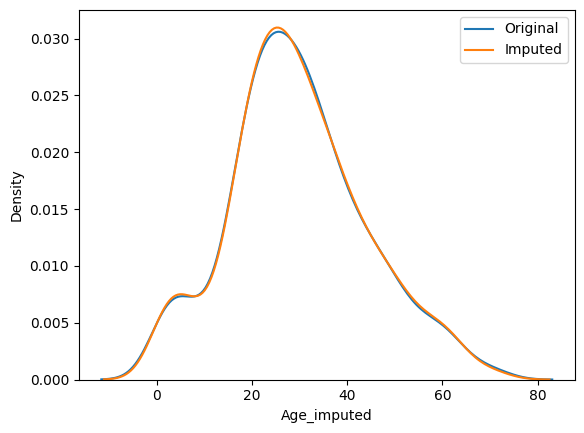

In [29]:
sns.distplot(X_train['Age'],label='Original',hist=False)
sns.distplot(X_train['Age_imputed'],label = 'Imputed',hist=False)

plt.legend()
plt.show()

Variance of 2 columns

In [30]:
print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_imputed'].var())

Original variable variance:  204.34951339046142
Variance after random imputation:  203.87249770520236


In [31]:
X_train[['Fare', 'Age', 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,48.635774
Age,71.512440,204.349513,204.349513
Age_imputed,48.635774,204.349513,203.872498


Doesn't affect outliers much

In [32]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
plt.show()

<Axes: >

In [59]:
X_train[['Age', 'Age_imputed']].boxplot()

<ipython-input-59-e022f194d9d8>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
<ipython-input-59-e022f194d9d8>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['Firepla

When model is live, model will take random values when there is missing data every time, so we use random_state to have a standardized value. Eg - if 2 users give same input, output should also be same

In [38]:
#sampled_value = X_train['Age'].dropna().sample(1, random_state=int(observation['Fare']))

In [39]:
data = pd.read_csv('house-train.csv',usecols=['GarageQual','FireplaceQu', 'SalePrice'])

In [40]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [41]:
data.isnull().mean() * 100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [42]:
X = data
y = data['SalePrice']

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [44]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [45]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
1384,NaN,TA,105000,TA,NaN
1208,NaN,TA,140000,TA,NaN
1184,TA,TA,186700,TA,TA
1119,NaN,TA,133700,TA,NaN
341,NaN,TA,82000,TA,NaN


In [ ]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

In [48]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
1164,TA,TA,194000,TA,TA
913,NaN,TA,145000,TA,Gd
1213,NaN,TA,145000,TA,Gd
1445,NaN,TA,129000,TA,Gd
953,Po,TA,172000,TA,Po


In [49]:
X_train['GarageQual'].value_counts()

TA    1049
Fa      41
Gd      11
Po       1
Ex       1
Name: GarageQual, dtype: int64

In [51]:
len(X_train['GarageQual'].dropna())

1103

In [55]:
 X_train['GarageQual_imputed'].value_counts()

TA    1111
Fa      43
Gd      12
Po       1
Ex       1
Name: GarageQual_imputed, dtype: int64

In [53]:
temp = pd.concat(
        [
            X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
            X_train['GarageQual_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

In [54]:
temp

,original,imputed
TA,0.951043,0.951199
Fa,0.037171,0.036815
Gd,0.009973,0.010274
Po,0.000907,0.000856
Ex,0.000907,0.000856


Beacuse GarageQual orginal and imputed difference is not that significant, we can use this technique for this column

In [57]:
temp = pd.concat(
        [
            X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
            X_train['FireplaceQu_imputed'].value_counts() / len(df)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp

,original,imputed
Gd,0.494272,0.650954
TA,0.412439,0.542088
Fa,0.040917,0.049383
Po,0.027823,0.035915
Ex,0.024550,0.032548


for FireplaceQu, difference is quite significant so its a red flag

In [58]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
plt.show()

<ipython-input-58-1d278de3936c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
<ipython-input-58-1d278de3936c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu'] =

Conclusion: for FireplaceQu not a good technique to use random sample 